In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
city_path = f'{h08dir}/wsi/dat/cmy/cmy_citylonlat.npy'
basin_path = f'{h08dir}/wsi/dat/cmy/cmy_basinlonlat.npy'
city_list = np.load(city_path)
basin_list = np.load(basin_path)
#([city_num, cnt_lon, cnt_lat, cmy])

In [11]:
RATE = []
# city/basin
# blue = city has more water availability
# red = basin has more water availability
for i, j in zip(city_list, basin_list):
    rate = float(i[3]/j[3])
    RATE.append((i[0], i[1], i[2], rate))
    
rate_array =  np.array(RATE)

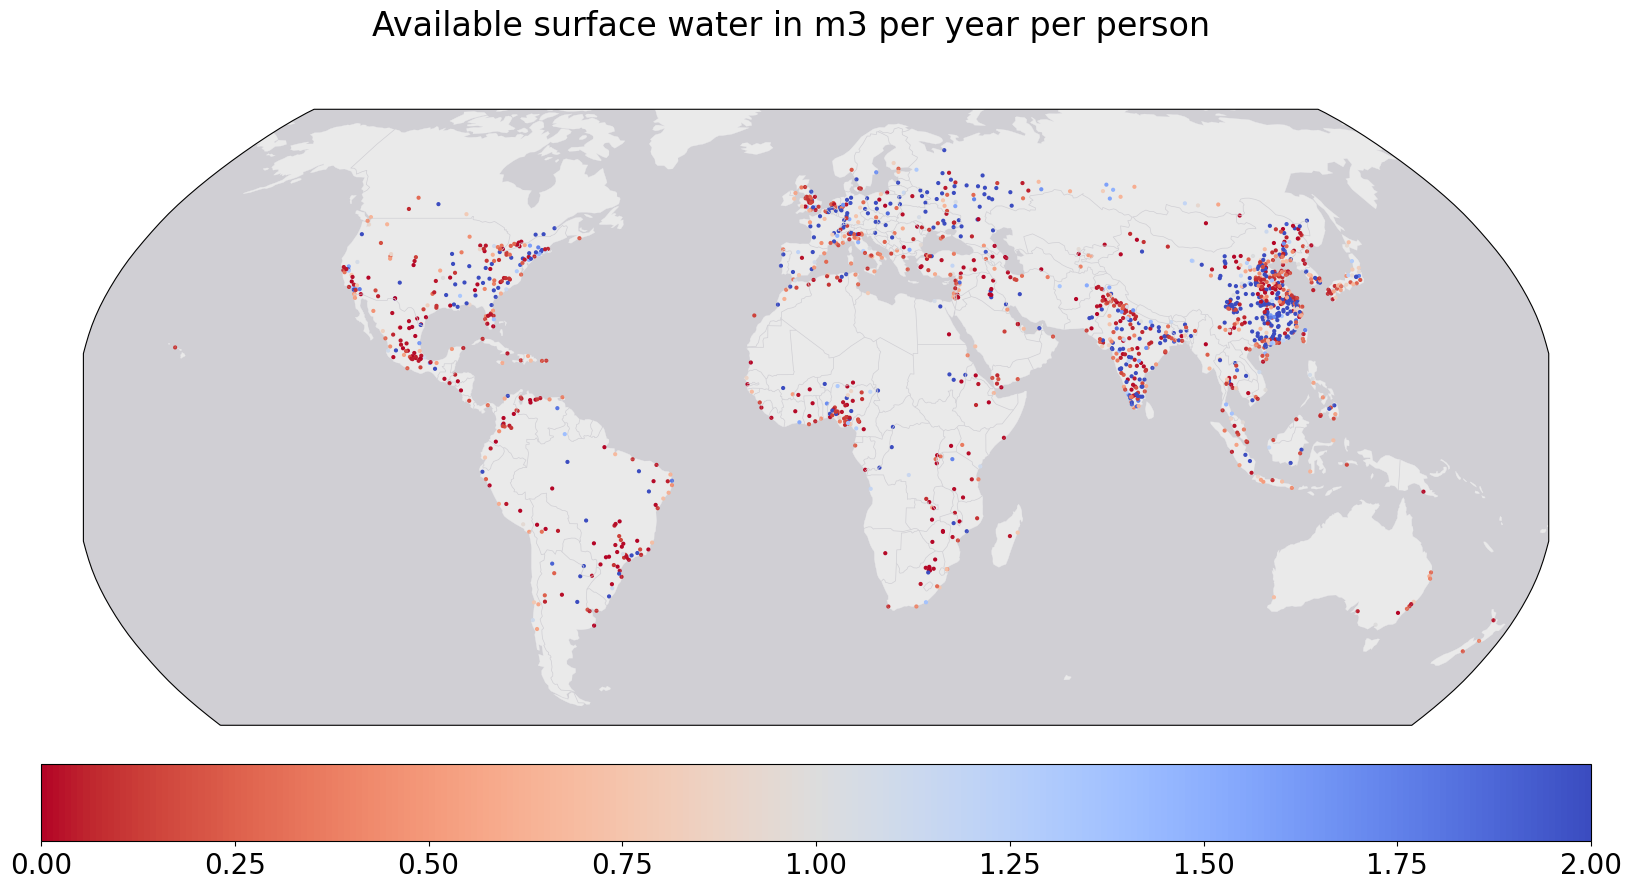

In [12]:
import matplotlib.colors as mcolors

norm = mcolors.TwoSlopeNorm(vcenter=1, vmin=0, vmax=2)
cmap = 'coolwarm_r'

plt.rcParams["font.size"] = 20
projection = ccrs.Robinson(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([-180, 180, -60, 75], crs=crs)
img = ax.scatter(
              rate_array[:, 1], 
              rate_array[:, 2], 
              c=rate_array[:, 3], 
              s=4, 
              cmap= cmap,
              norm=norm,
              transform=ccrs.PlateCarree(), 
             )
#ax.gridlines()
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()

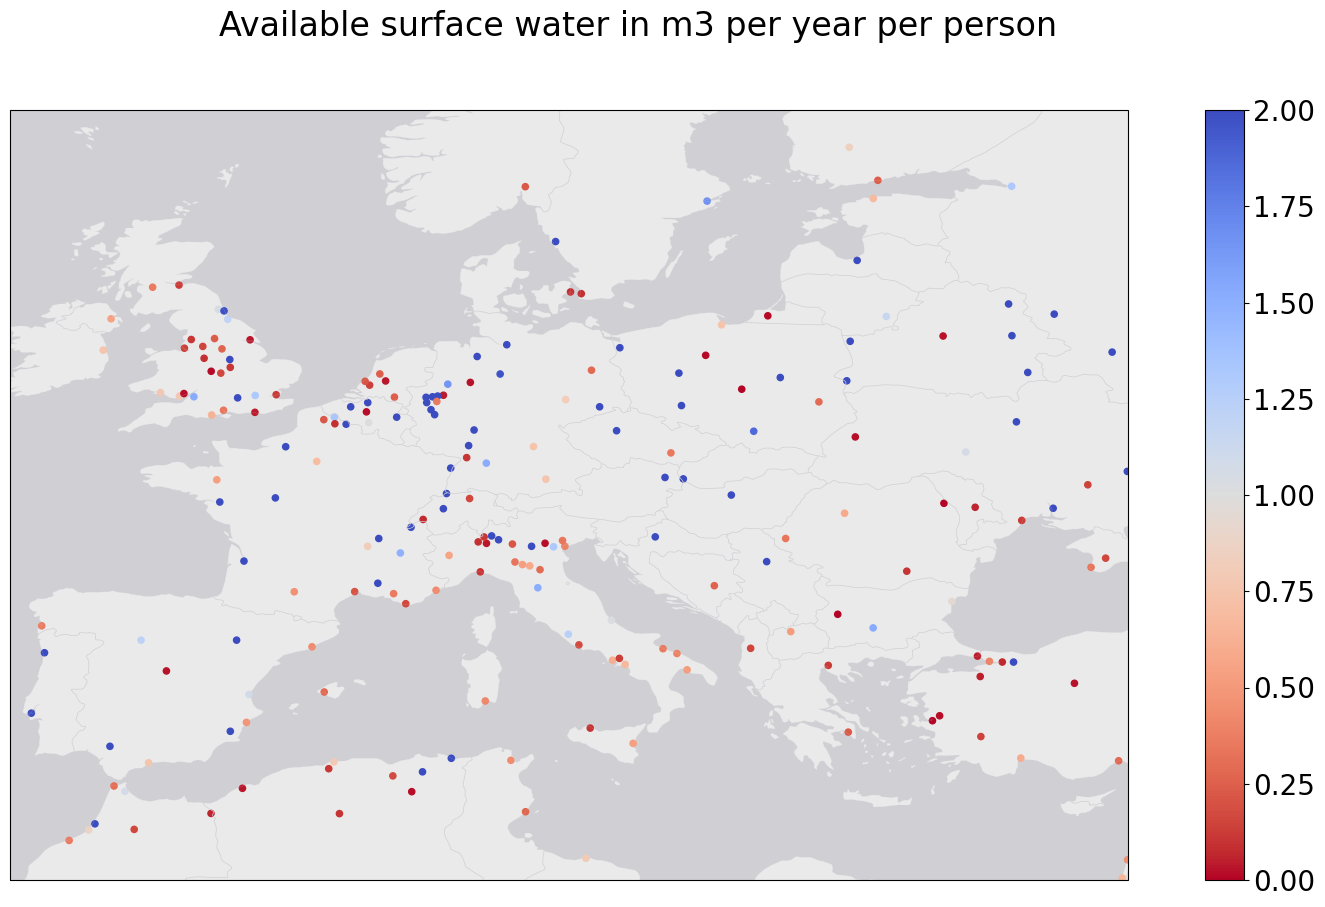

In [7]:
norm = mcolors.TwoSlopeNorm(vcenter=1, vmin=0, vmax=2)
cmap = 'coolwarm_r'

plt.rcParams["font.size"] = 20
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([-10, 35, 32, 63], crs=crs)
img = ax.scatter(
              rate_array[:, 1], 
              rate_array[:, 2], 
              c=rate_array[:, 3], 
              s=20, 
              cmap= cmap,
              norm=norm,
              transform=ccrs.PlateCarree(), 
             )
#ax.gridlines()
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
cbar = fig.colorbar(img, ax=ax, orientation='vertical', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()

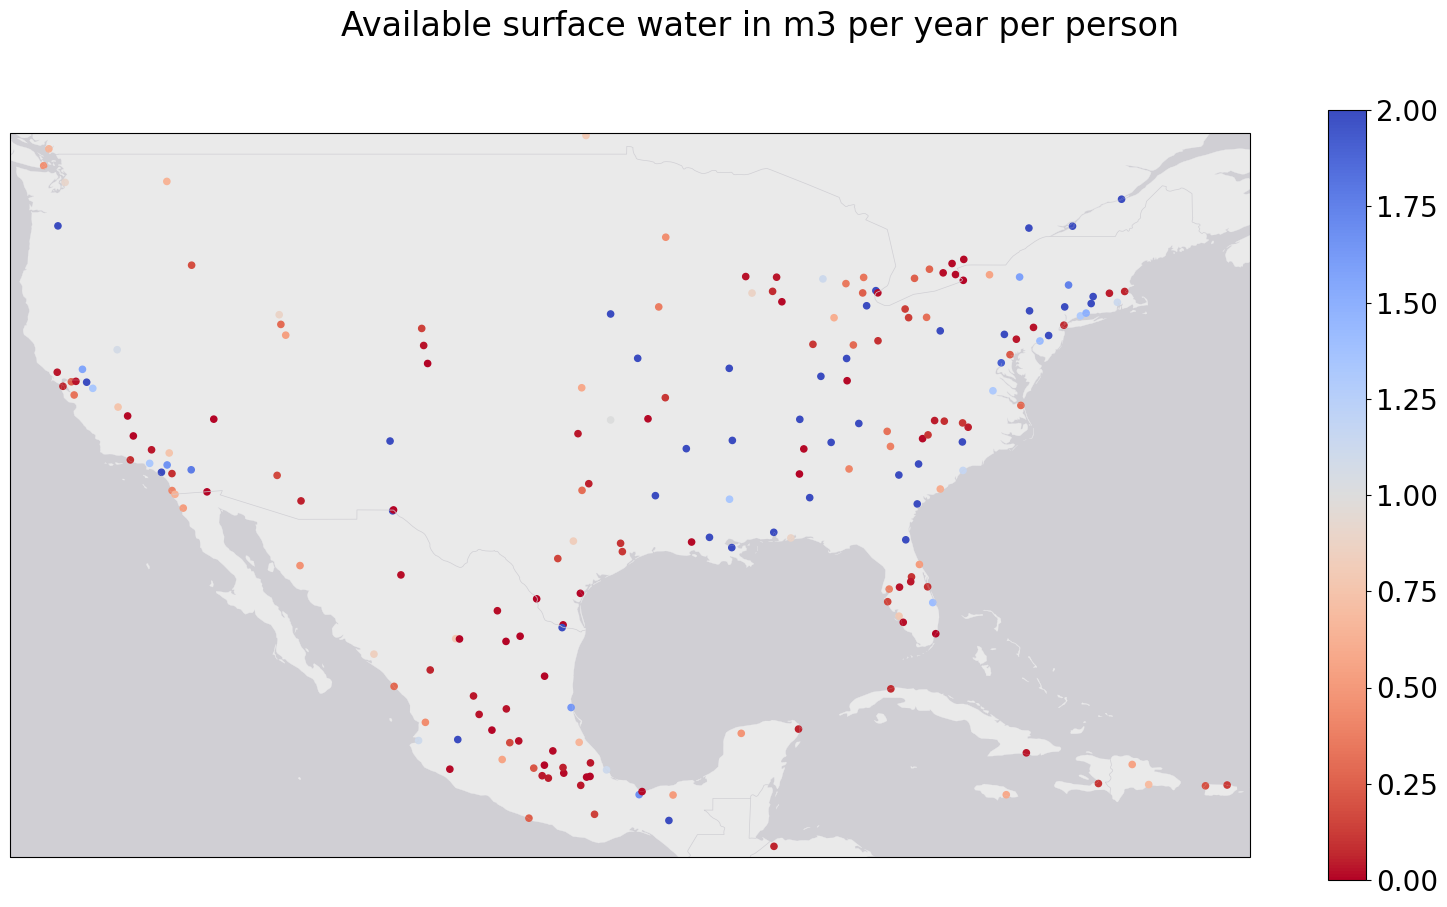

In [8]:
norm = mcolors.TwoSlopeNorm(vcenter=1, vmin=0, vmax=2)
cmap = 'coolwarm_r'

plt.rcParams["font.size"] = 20
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([-125, -65, 15, 50], crs=crs)
img = ax.scatter(
              rate_array[:, 1], 
              rate_array[:, 2], 
              c=rate_array[:, 3], 
              s=20, 
              cmap= cmap,
              norm=norm,
              transform=ccrs.PlateCarree(), 
             )
#ax.gridlines()
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
cbar = fig.colorbar(img, ax=ax, orientation='vertical', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()

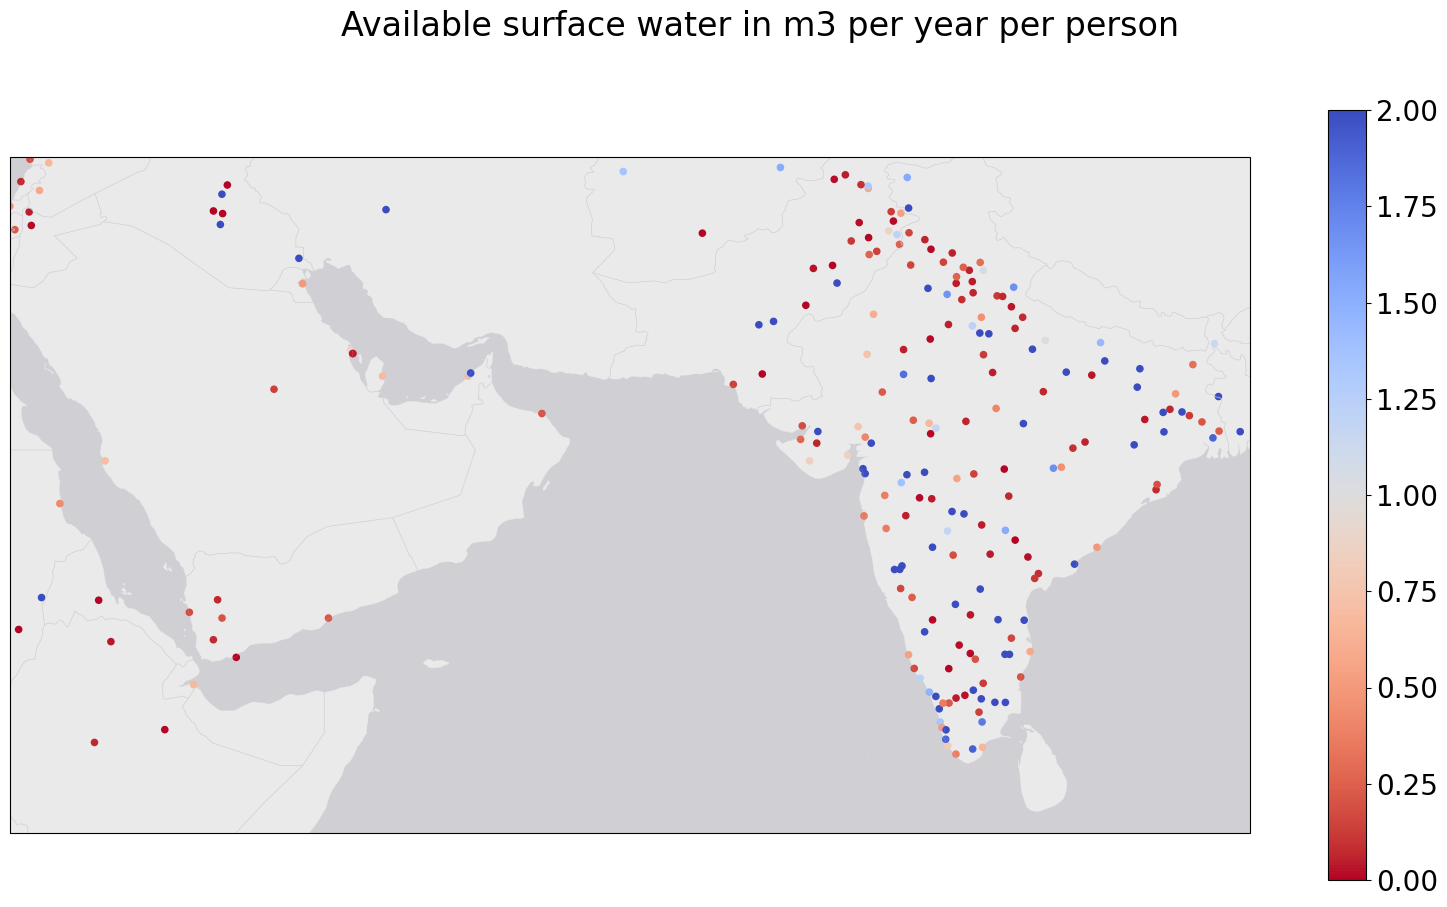

In [9]:
norm = mcolors.TwoSlopeNorm(vcenter=1, vmin=0, vmax=2)
cmap = 'coolwarm_r'

plt.rcParams["font.size"] = 20
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([35, 90, 5, 35], crs=crs)
img = ax.scatter(
              rate_array[:, 1], 
              rate_array[:, 2], 
              c=rate_array[:, 3], 
              s=20, 
              cmap= cmap,
              norm=norm,
              transform=ccrs.PlateCarree(), 
             )
#ax.gridlines()
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
cbar = fig.colorbar(img, ax=ax, orientation='vertical', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()

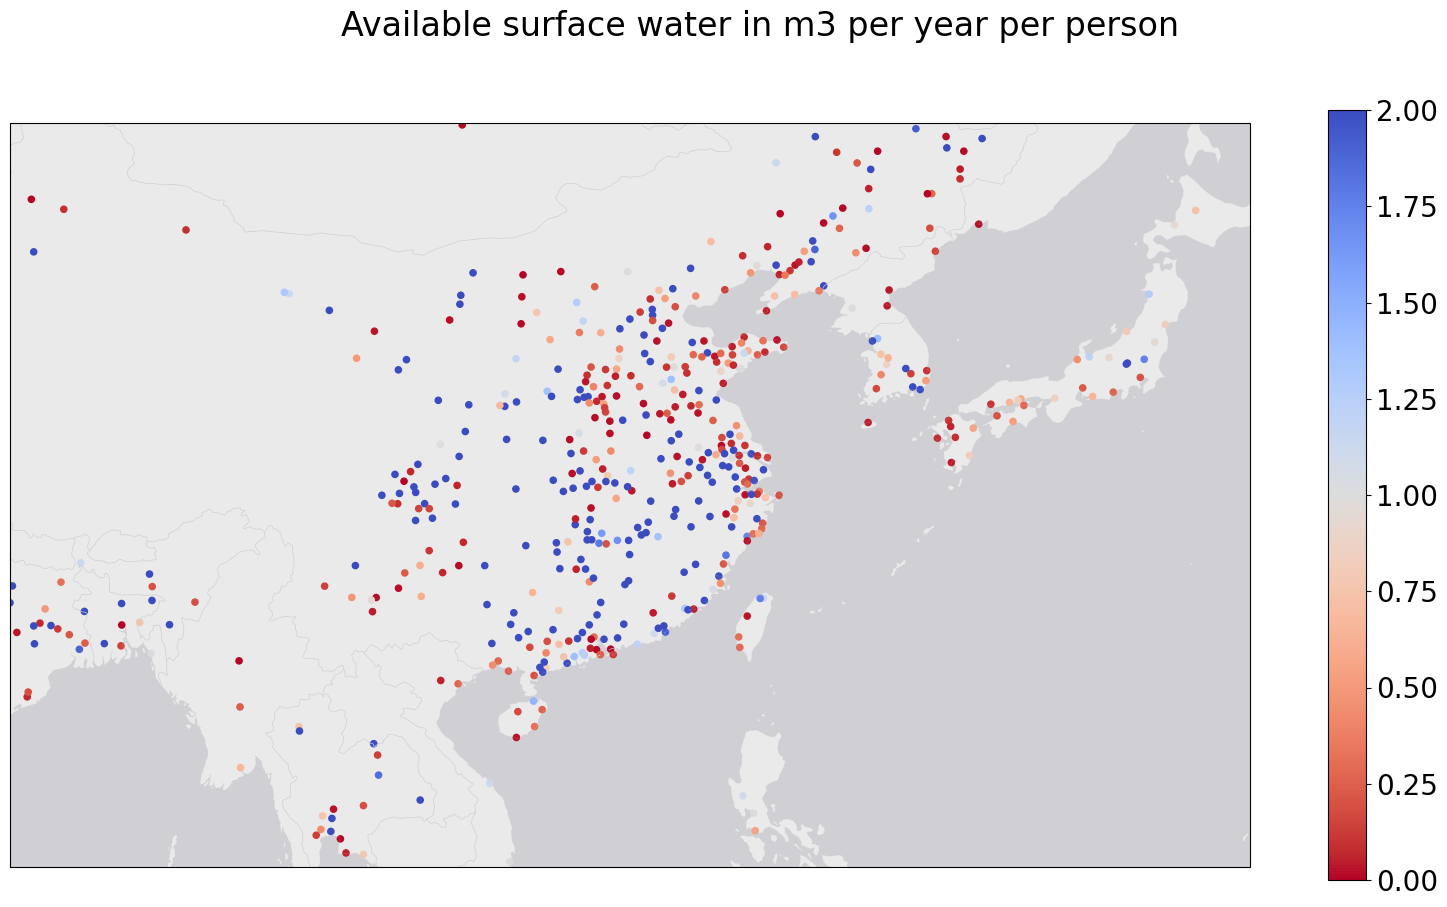

In [10]:
norm = mcolors.TwoSlopeNorm(vcenter=1, vmin=0, vmax=2)
cmap = 'coolwarm_r'

plt.rcParams["font.size"] = 20
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([85, 145, 12, 48], crs=crs)
img = ax.scatter(
              rate_array[:, 1], 
              rate_array[:, 2], 
              c=rate_array[:, 3], 
              s=20, 
              cmap= cmap,
              norm=norm,
              transform=ccrs.PlateCarree(), 
             )
#ax.gridlines()
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
cbar = fig.colorbar(img, ax=ax, orientation='vertical', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()